In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes= pd.read_csv("diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Project Task:  1

#1  Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#2  Visually explore these variables using histograms. Treat the missing values accordingly.

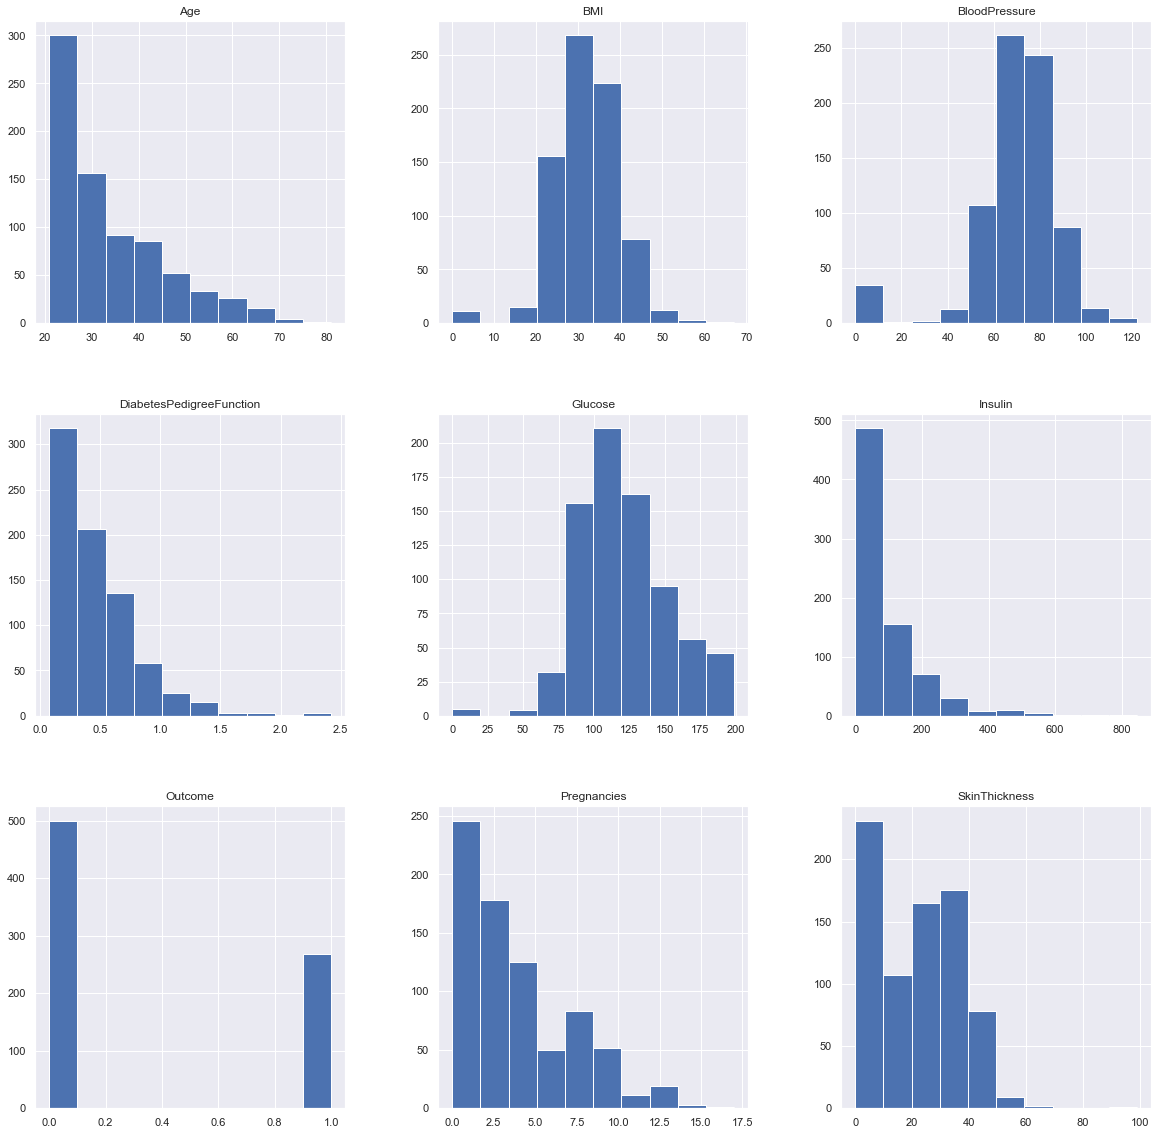

In [6]:
Hist= diabetes.hist(figsize = (20,20))

#There are no missing values in the dataset so no need to treat further

In [7]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
diabetes.shape

(768, 9)

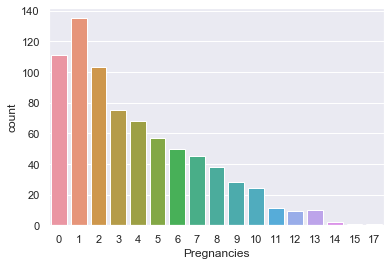

In [9]:
sns.countplot(x="Pregnancies", data=diabetes)

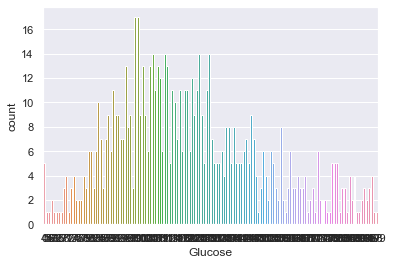

In [10]:
sns.countplot(x="Glucose",data=diabetes)

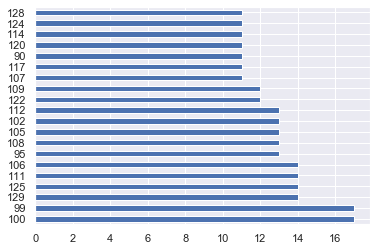

In [11]:
diabetes['Glucose'].value_counts().head(20).plot(kind='barh')

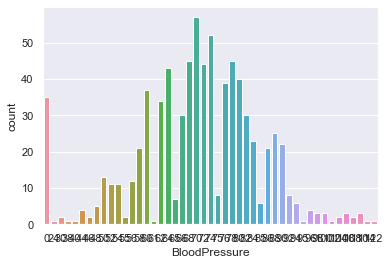

In [12]:
sns.countplot(x="BloodPressure", data=diabetes)

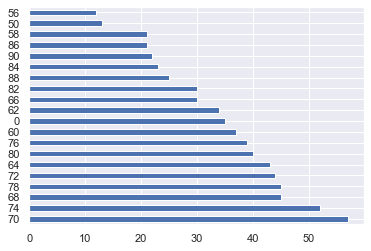

In [13]:
diabetes['BloodPressure'].value_counts().head(20).plot(kind='barh')

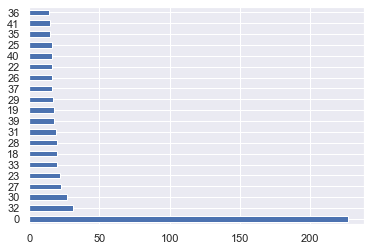

In [15]:
diabetes['SkinThickness'].value_counts().head(20).plot(kind='barh')

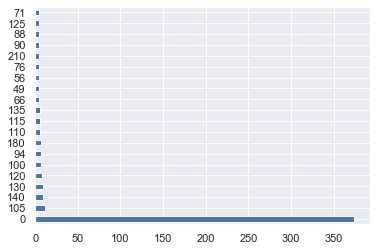

In [17]:
diabetes['Insulin'].value_counts().head(20).plot(kind='barh')

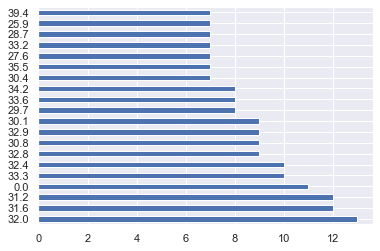

In [19]:
diabetes['BMI'].value_counts().head(20).plot(kind='barh')

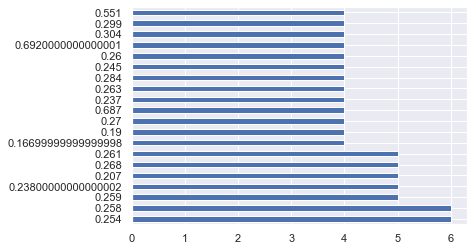

In [21]:
diabetes['DiabetesPedigreeFunction'].value_counts().head(20).plot(kind='barh')

# Project Task:  2

#1 checking the balance of the data by plotting the count of outcomes by their value

0    500
1    268
Name: Outcome, dtype: int64


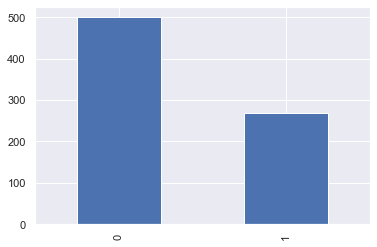

In [22]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())
p=diabetes.Outcome.value_counts().plot(kind="bar")

#The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. 
#The number of non-diabetics seems twice the number of diabetic patients

#2:  Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

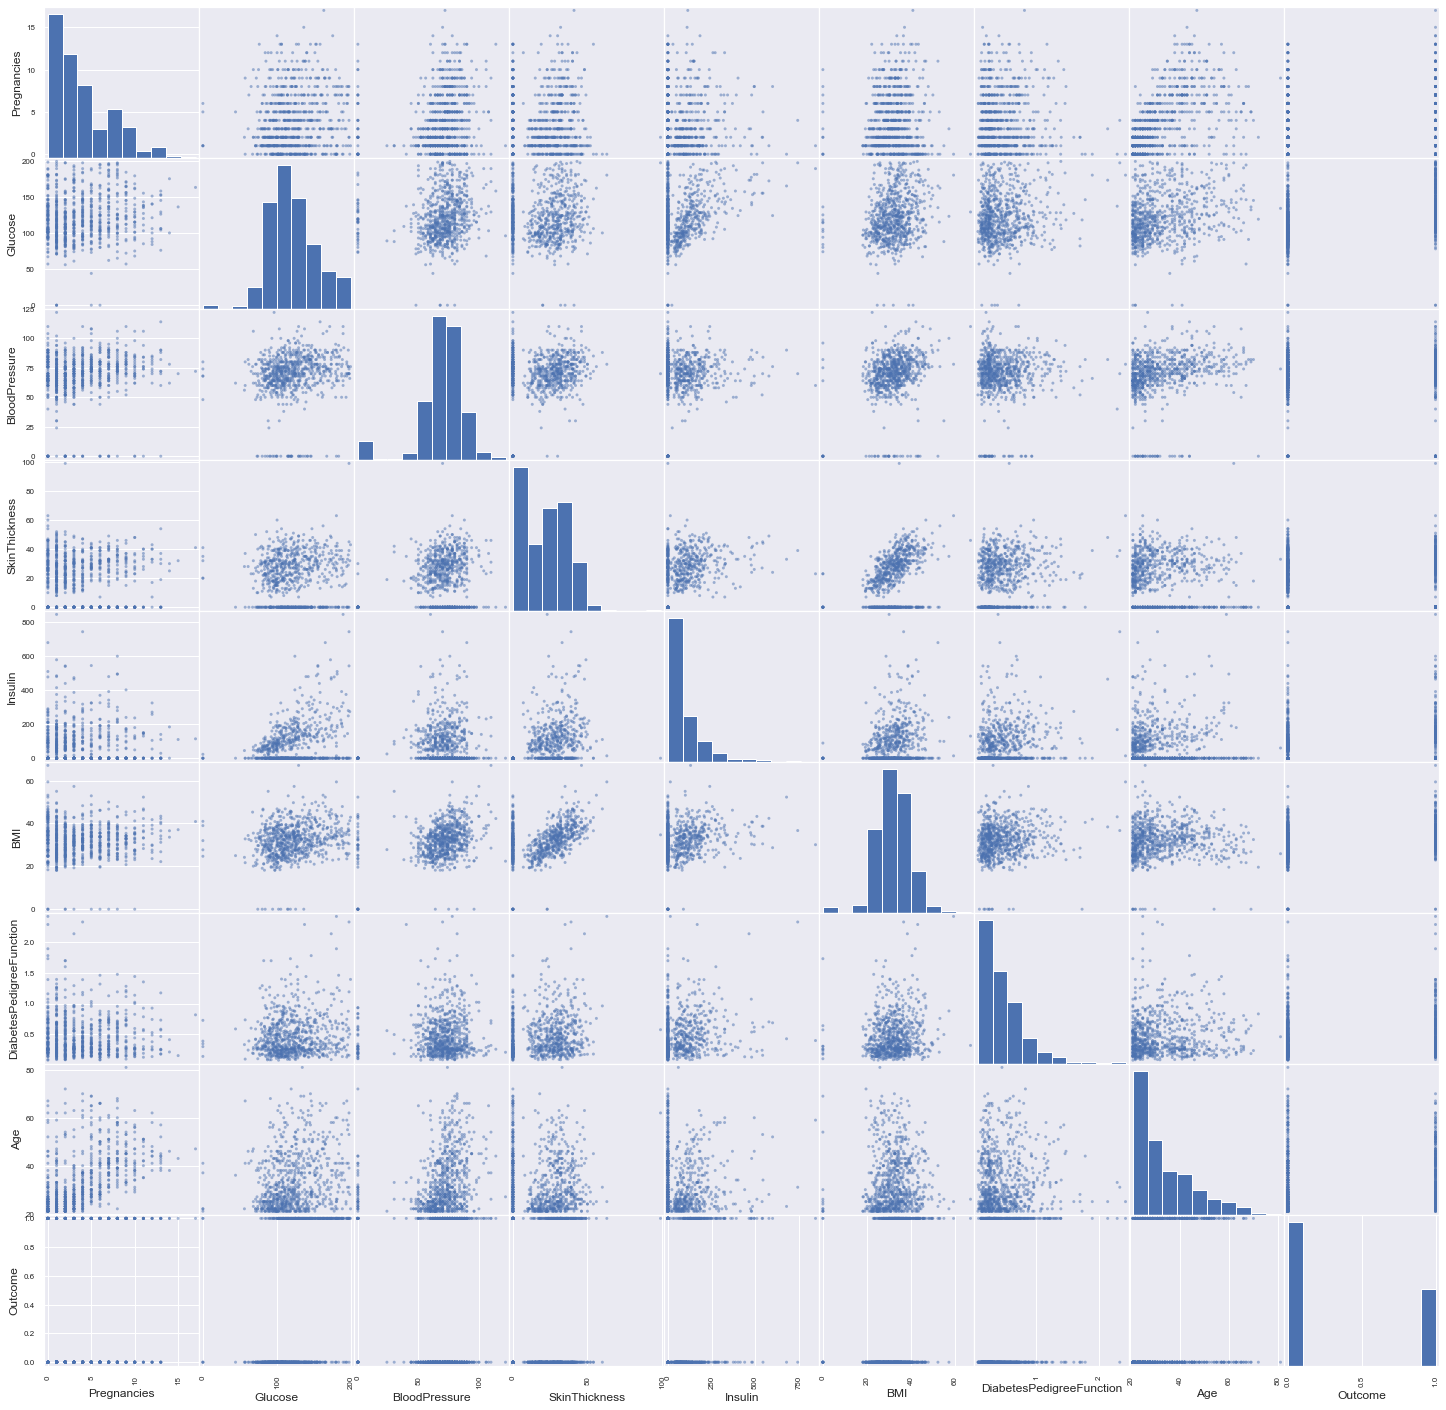

In [23]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes,figsize=(25, 25))

#The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

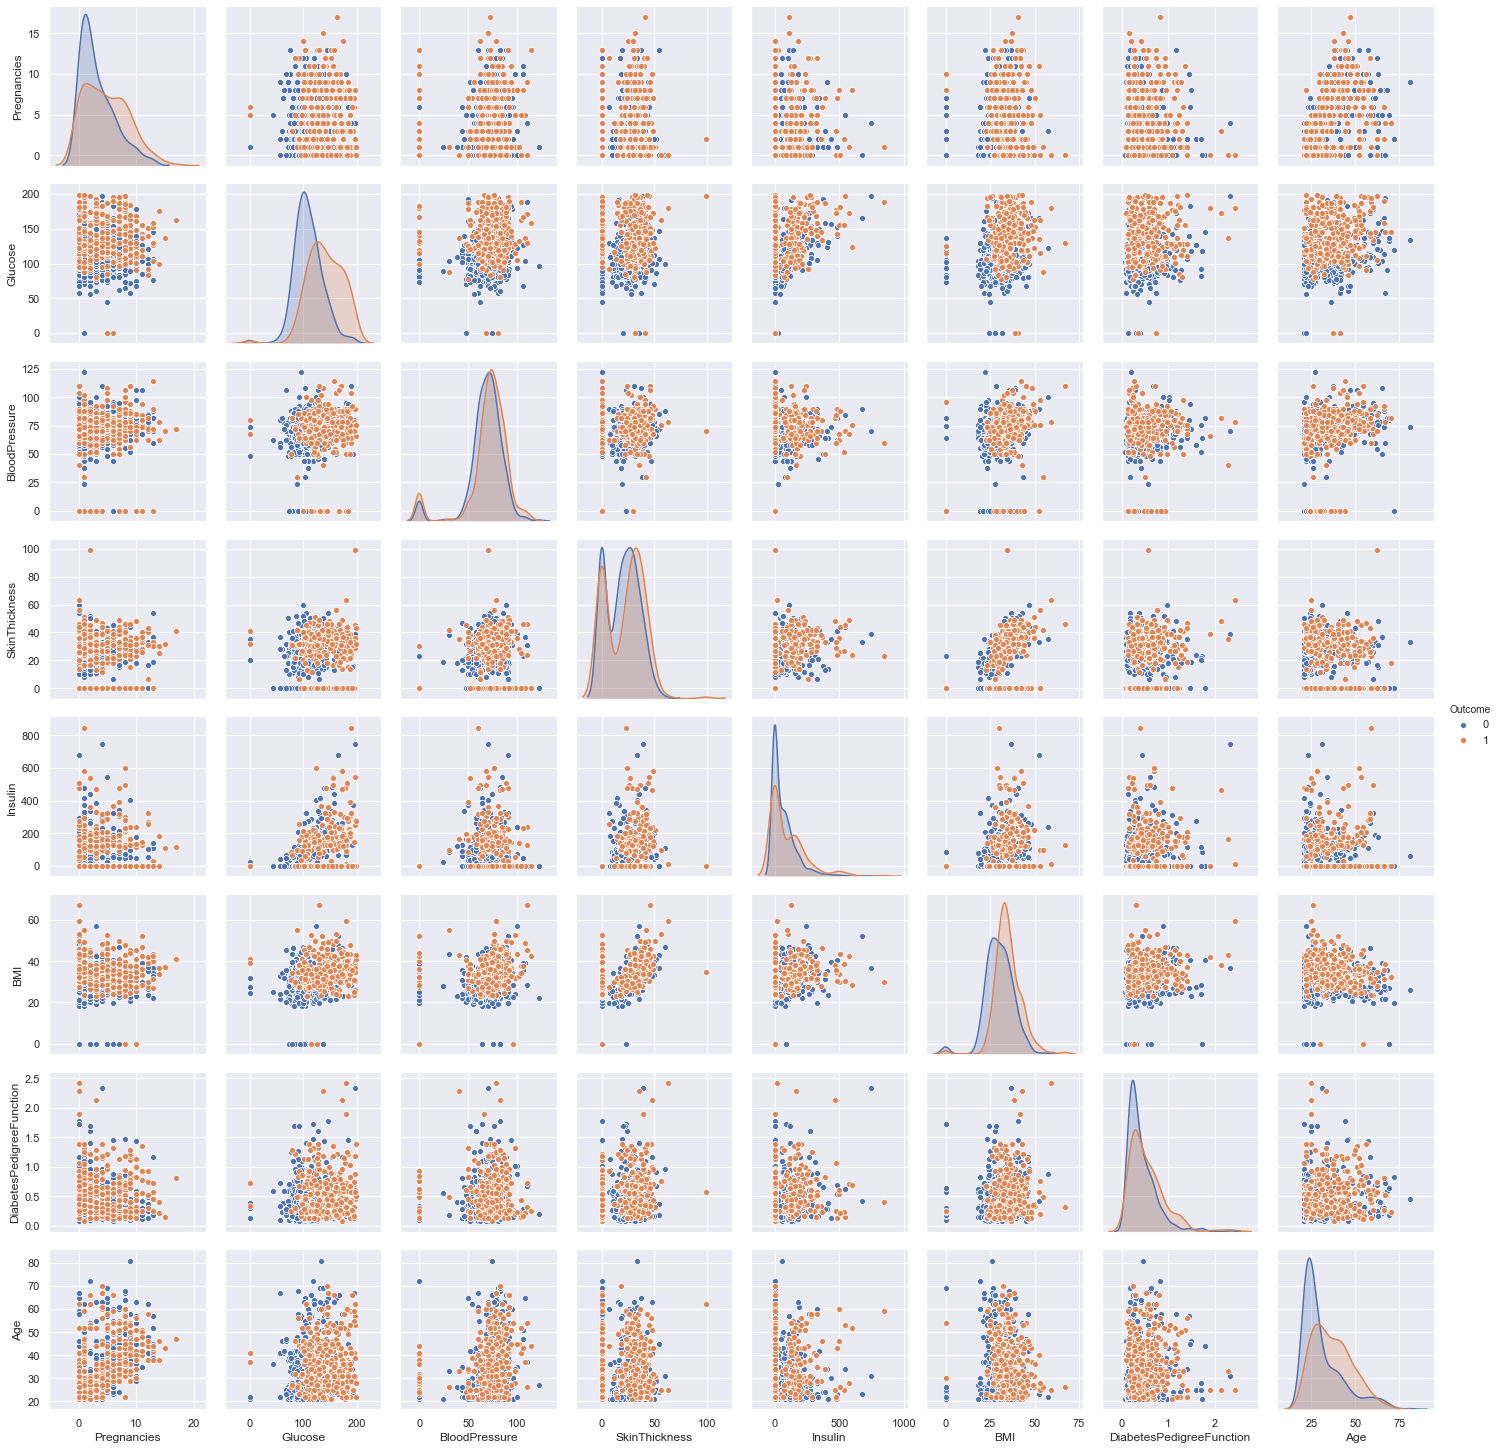

In [24]:
#pair plot

p=sns.pairplot(diabetes, hue = 'Outcome')

In [25]:
# Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

#A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#3 Perform correlation analysis. Visually explore it using a heat map.

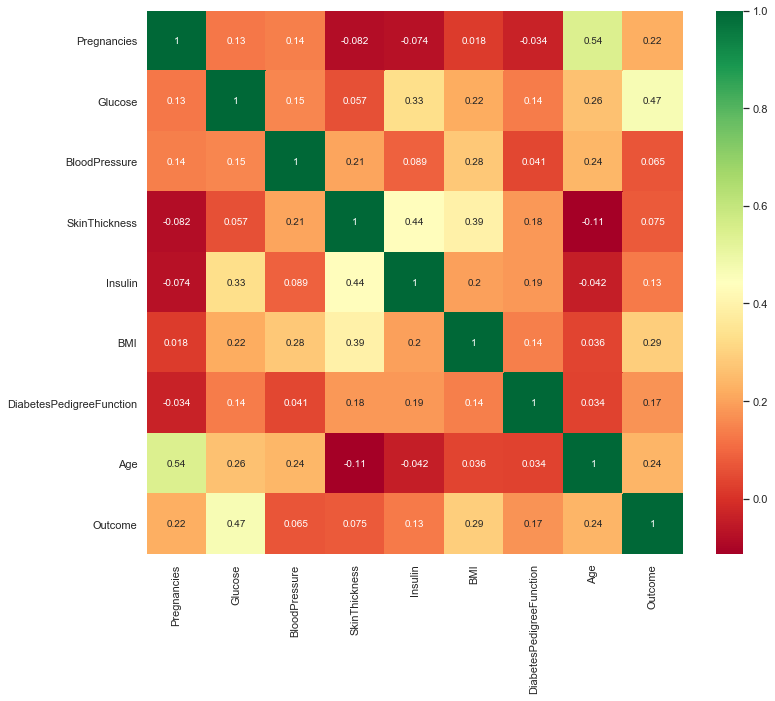

In [26]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')

# Project Task:  3

#1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

#2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [28]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier


In [29]:
array = diabetes.values


In [30]:
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 30

In [31]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X,Y,cv=kfold)
print(results.mean())

0.760457963089542


#Another algorithm

In [32]:
from sklearn import svm
from xgboost import XGBClassifier
clf= XGBClassifier()
seed=7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model= XGBClassifier(n_estimators=num_trees, random_state=seed)
results= model_selection.cross_val_score(model, X,Y,cv=kfold)
print(results.mean())


0.7499487354750513


# KNN algorithm

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [34]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [35]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes.Outcome


In [36]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [37]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [38]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76953125

# Project Task:  4

#1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. 
#Please be descriptive to explain what values of these parameter you have used.

In [39]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,147,20,167
1,39,50,89
All,186,70,256


Text(0.5, 12.5, 'Predicted label')

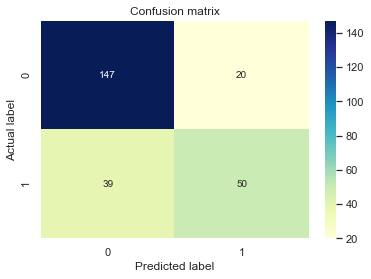

In [40]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Classification report

#Report which includes Precision, Recall and F1-Score.

In [41]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       167
           1       0.71      0.56      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



#ROC - AUC


In [42]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

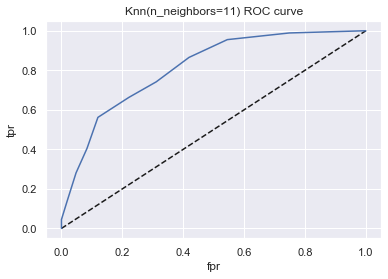

In [43]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [44]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8119154948529905

In [45]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7669892199303965
Best Parameters: {'n_neighbors': 17}
